In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import scipy

In [2]:
experiment = "CA1_clust4-60_AP"
setting = "na_true_1.5noise1"

prob_all = np.load("/media/hdd01/sklee/"+experiment+"/"+setting+"/gru_l20_h40_0.2ms_test.npy").flatten()
spk = np.load("/media/hdd01/sklee/"+experiment+"/data/spike_train_0.2ms.npy")[980*50000:].flatten()
prec_all, rec_all, thresh_list = precision_recall_curve(spk, prob_all)
#thresh_list = thresh_list[np.arange(0,thresh_list.shape[0],5)]

ms_list = [1,2,5,10]
pr_array = np.empty((4,thresh_list.shape[0],2))

for n in tnrange(4):
    bin_size = ms_list[n] * 5
    
    for i in tnrange(thresh_list.shape[0]):
        thresh = thresh_list[i]
        prob_new = np.copy(prob_all)
        prob_new[prob_all<thresh] = 0
        prob_new[prob_all>=thresh] = 1
        
        prob_bin = scipy.ndimage.convolve1d(prob_new.reshape(20,50000), np.ones((bin_size)), 1)
        prob_bin = prob_bin[:,bin_size-1:-bin_size+1]
        prob_bin[prob_bin>0] = 1
        spk_bin = scipy.ndimage.convolve1d(spk.reshape(20,50000), np.ones((bin_size)), 1)
        spk_bin = spk_bin[:,bin_size-1:-bin_size+1]
        spk_bin[spk_bin>0] = 1
        
        tp = np.where((prob_bin == 1) & (spk_bin == 1))[0].size
        fp = np.where((prob_bin == 1) & (spk_bin == 0))[0].size
        tn = np.where((prob_bin == 0) & (spk_bin == 0))[0].size
        fn = np.where((prob_bin == 0) & (spk_bin == 1))[0].size
        
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        pr_array[n,i,0] = prec
        pr_array[n,i,1] = rec

<ipython-input-2-33858e0de8a9>:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for n in tnrange(4):


  0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-2-33858e0de8a9>:15: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(thresh_list.shape[0]):


  0%|          | 0/30074 [00:00<?, ?it/s]

  0%|          | 0/30074 [00:00<?, ?it/s]

  0%|          | 0/30074 [00:00<?, ?it/s]

  0%|          | 0/30074 [00:00<?, ?it/s]

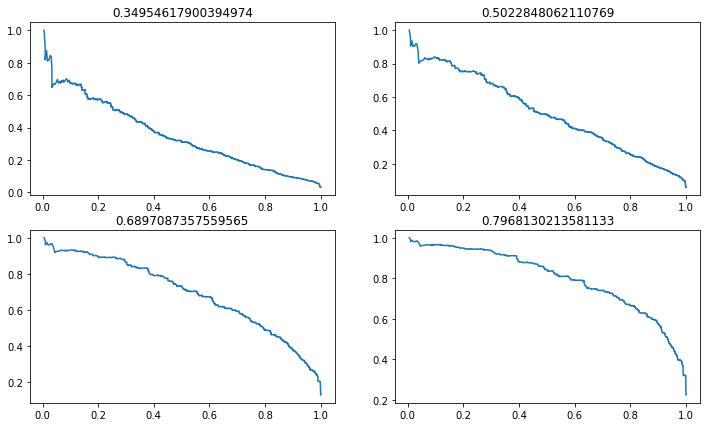

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
for row in range(2):
    for col in range(2):
        idx = row*2+col
        axs[row,col].plot(pr_array[idx,:,1],pr_array[idx,:,0])
        axs[row,col].set_title(str(metrics.auc(pr_array[idx,:,1],pr_array[idx,:,0])))

In [4]:
np.save("/media/hdd01/sklee/"+experiment+"/"+setting+"/prec_rec_"+setting+".npy", pr_array)

In [23]:
auc_array = np.zeros((4,15))

experiment = "CA1_clust4-60_aSoma"

ap_true_pr = np.load("/media/hdd01/sklee/"+experiment+"/ap_true/prec_rec_ap_true.npy")
na_true_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true/prec_rec_na_true.npy")
comb_pred_pr = np.load("/media/hdd01/sklee/"+experiment+"/comb_pred/prec_rec_comb_pred.npy")
whole_pred_pr = np.load("/media/hdd01/sklee/"+experiment+"/whole_pred/prec_rec_whole_pred.npy")
nona_true_pr = np.load("/media/hdd01/sklee/"+experiment+"/nona_true/prec_rec_nona_true.npy")
nona_pred_pr = np.load("/media/hdd01/sklee/"+experiment+"/nona_pred/prec_rec_nona_pred.npy")
diff_true_pr = np.load("/media/hdd01/sklee/"+experiment+"/diff_true/prec_rec_diff_true.npy")
diff_pred_pr = np.load("/media/hdd01/sklee/"+experiment+"/diff_pred/prec_rec_diff_pred.npy")
na_true_nona_pred_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_nona_pred/prec_rec_na_true_nona_pred.npy")
na_pred_nona_true_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_pred_nona_true/prec_rec_na_pred_nona_true.npy")
na_true_late_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_late/prec_rec_na_true_late.npy")
comb_pred_late_pr = np.load("/media/hdd01/sklee/"+experiment+"/comb_pred_late/prec_rec_comb_pred_late.npy")
na_true_noise1_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_noise1/prec_rec_na_true_noise1.npy")
na_true_noise2_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_noise2/prec_rec_na_true_noise2.npy")
na_true_noise3_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_noise3/prec_rec_na_true_noise3.npy")

for i in tnrange(4):
    prarea_ap_true = metrics.auc(ap_true_pr[i,:,1], ap_true_pr[i,:,0])
    prarea_na_true = metrics.auc(na_true_pr[i,:,1], na_true_pr[i,:,0])
    prarea_comb_pred = metrics.auc(comb_pred_pr[i,:,1], comb_pred_pr[i,:,0])
    prarea_whole_pred = metrics.auc(whole_pred_pr[i,:,1], whole_pred_pr[i,:,0])
    prarea_nona_true = metrics.auc(nona_true_pr[i,:,1], nona_true_pr[i,:,0])
    prarea_nona_pred = metrics.auc(nona_pred_pr[i,:,1], nona_pred_pr[i,:,0])
    prarea_diff_true = metrics.auc(diff_true_pr[i,:,1], diff_true_pr[i,:,0])
    prarea_diff_pred = metrics.auc(diff_pred_pr[i,:,1], diff_pred_pr[i,:,0])
    prarea_na_true_nona_pred = metrics.auc(na_true_nona_pred_pr[i,:,1], na_true_nona_pred_pr[i,:,0])
    prarea_na_pred_nona_true = metrics.auc(na_pred_nona_true_pr[i,:,1], na_pred_nona_true_pr[i,:,0])
    prarea_na_true_late = metrics.auc(na_true_late_pr[i,:,1], na_true_late_pr[i,:,0])
    prarea_comb_pred_late = metrics.auc(comb_pred_late_pr[i,:,1], comb_pred_late_pr[i,:,0])
    prarea_na_true_noise1 = metrics.auc(na_true_noise1_pr[i,:,1], na_true_noise1_pr[i,:,0])
    prarea_na_true_noise2 = metrics.auc(na_true_noise2_pr[i,:,1], na_true_noise2_pr[i,:,0])
    prarea_na_true_noise3 = metrics.auc(na_true_noise3_pr[i,:,1], na_true_noise3_pr[i,:,0])
    
    auc_array[i,0] = prarea_ap_true
    auc_array[i,1] = prarea_na_true
    auc_array[i,2] = prarea_comb_pred
    auc_array[i,3] = prarea_whole_pred
    auc_array[i,4] = prarea_nona_true
    auc_array[i,5] = prarea_nona_pred
    auc_array[i,6] = prarea_diff_true
    auc_array[i,7] = prarea_diff_pred
    auc_array[i,8] = prarea_na_true_nona_pred
    auc_array[i,9] = prarea_na_pred_nona_true
    auc_array[i,10] = prarea_na_true_late
    auc_array[i,11] = prarea_comb_pred_late
    auc_array[i,12] = prarea_na_true_noise1
    auc_array[i,13] = prarea_na_true_noise2
    auc_array[i,14] = prarea_na_true_noise3
    

<ipython-input-23-67584b363f9c>:21: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(4):


  0%|          | 0/4 [00:00<?, ?it/s]

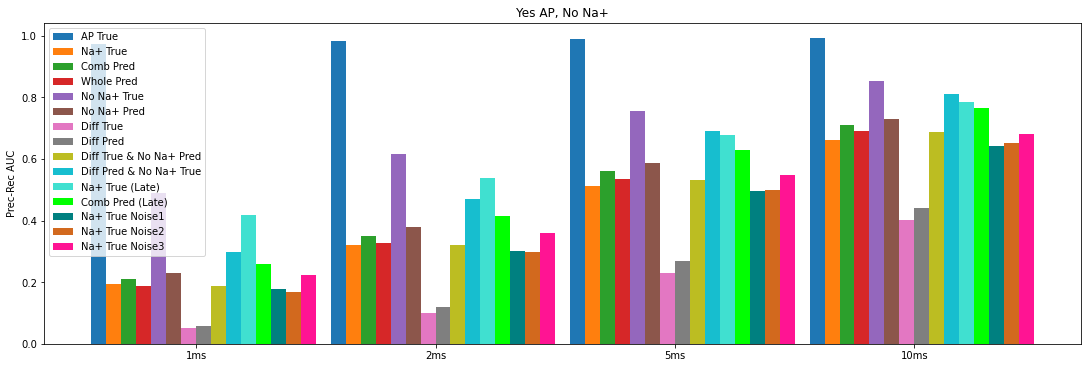

In [24]:
fig = plt.figure(constrained_layout=True, figsize = (15,5))
gs = fig.add_gridspec(1,1, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])

colors = ["tab:blue","tab:orange","tab:green",
         "tab:red","tab:purple","tab:brown","tab:pink","tab:gray",
         "tab:olive","tab:cyan","turquoise","lime", "teal", "chocolate", "deeppink"]

width = 1
ap_true_bar = ax.bar(np.arange(0,16*4,16), auc_array[:,0], width, label='AP True', color=colors[0])
na_true_bar = ax.bar(np.arange(1,16*4+1,16), auc_array[:,1], width, label='Na+ True', color=colors[1])
na_true_bar = ax.bar(np.arange(2,16*4+2,16), auc_array[:,2], width, label='Comb Pred', color=colors[2])
na_true_bar = ax.bar(np.arange(3,16*4+3,16), auc_array[:,3], width, label='Whole Pred', color=colors[3])
na_true_bar = ax.bar(np.arange(4,16*4+4,16), auc_array[:,4], width, label='No Na+ True', color=colors[4])
na_true_bar = ax.bar(np.arange(5,16*4+5,16), auc_array[:,5], width, label='No Na+ Pred', color=colors[5])
na_true_bar = ax.bar(np.arange(6,16*4+6,16), auc_array[:,6], width, label='Diff True', color=colors[6])
na_true_bar = ax.bar(np.arange(7,16*4+7,16), auc_array[:,7], width, label='Diff Pred', color=colors[7])
na_true_bar = ax.bar(np.arange(8,16*4+8,16), auc_array[:,8], width, label='Diff True & No Na+ Pred', color=colors[8])
na_true_bar = ax.bar(np.arange(9,16*4+9,16), auc_array[:,9], width, label='Diff Pred & No Na+ True', color=colors[9])
na_true_bar = ax.bar(np.arange(10,16*4+10,16), auc_array[:,10], width, label='Na+ True (Late)', color=colors[10])
na_true_bar = ax.bar(np.arange(11,16*4+11,16), auc_array[:,11], width, label='Comb Pred (Late)', color=colors[11])
na_true_bar = ax.bar(np.arange(12,16*4+12,16), auc_array[:,12], width, label='Na+ True Noise1', color=colors[12])
na_true_bar = ax.bar(np.arange(13,16*4+13,16), auc_array[:,13], width, label='Na+ True Noise2', color=colors[13])
na_true_bar = ax.bar(np.arange(14,16*4+14,16), auc_array[:,14], width, label='Na+ True Noise3', color=colors[14])

ax.legend()
ax.set_xticks(np.arange(6.5,16*4+6.5,16))
ax.set_xticklabels(["1ms","2ms","5ms","10ms"])
ax.set_ylabel("Prec-Rec AUC")
ax.set_title("Yes AP, No Na+")


plt.show()

In [55]:
auc_array = np.zeros((4,4 + 4+2+3))

experiment = "CA1_clust4-60_AP"

na_true_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true/prec_rec_na_true.npy")
comb_pred_pr = np.load("/media/hdd01/sklee/"+experiment+"/comb_pred/prec_rec_comb_pred.npy")
na_true_nona_pred_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_nona_pred/prec_rec_na_true_nona_pred.npy")
na_pred_nona_true_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_pred_nona_true/prec_rec_na_pred_nona_true.npy")
na_true_1noise1_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_1noise1/prec_rec_na_true_1noise1.npy")
na_true_15noise1_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_1.5noise1/prec_rec_na_true_1.5noise1.npy")
na_true_2noise1_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_2noise1/prec_rec_na_true_2noise1.npy")
na_true_3noise1_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_3noise1/prec_rec_na_true_3noise1.npy")
na_true_1noise2_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_1noise2/prec_rec_na_true_1noise2.npy")
na_true_05noise2_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_0.5noise2/prec_rec_na_true_0.5noise2.npy")
na_true_1noise3_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_1noise3/prec_rec_na_true_1noise3.npy")
na_true_2noise3_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_2noise3/prec_rec_na_true_2noise3.npy")
na_true_3noise3_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_3noise3/prec_rec_na_true_3noise3.npy")

for i in tnrange(4):
    prarea_na_true = metrics.auc(na_true_pr[i,:,1], na_true_pr[i,:,0])
    prarea_comb_pred = metrics.auc(comb_pred_pr[i,:,1], comb_pred_pr[i,:,0])
    prarea_na_true_nona_pred = metrics.auc(na_true_nona_pred_pr[i,:,1], na_true_nona_pred_pr[i,:,0])
    prarea_na_pred_nona_true = metrics.auc(na_pred_nona_true_pr[i,:,1], na_pred_nona_true_pr[i,:,0])
    prarea_na_true_1noise1 = metrics.auc(na_true_1noise1_pr[i,:,1], na_true_1noise1_pr[i,:,0])
    prarea_na_true_15noise1 = metrics.auc(na_true_15noise1_pr[i,:,1], na_true_15noise1_pr[i,:,0])
    prarea_na_true_2noise1 = metrics.auc(na_true_2noise1_pr[i,:,1], na_true_2noise1_pr[i,:,0])
    prarea_na_true_3noise1 = metrics.auc(na_true_3noise1_pr[i,:,1], na_true_3noise1_pr[i,:,0])
    prarea_na_true_1noise2 = metrics.auc(na_true_1noise2_pr[i,:,1], na_true_1noise2_pr[i,:,0])
    prarea_na_true_05noise2 = metrics.auc(na_true_05noise2_pr[i,:,1], na_true_05noise2_pr[i,:,0])
    prarea_na_true_1noise3 = metrics.auc(na_true_1noise3_pr[i,:,1], na_true_1noise3_pr[i,:,0])
    prarea_na_true_2noise3 = metrics.auc(na_true_2noise3_pr[i,:,1], na_true_2noise3_pr[i,:,0])
    prarea_na_true_3noise3 = metrics.auc(na_true_3noise3_pr[i,:,1], na_true_3noise3_pr[i,:,0])
    
    auc_array[i,0] = prarea_na_true
    auc_array[i,1] = prarea_comb_pred
    auc_array[i,2] = prarea_na_true_1noise1
    auc_array[i,3] = prarea_na_true_15noise1
    auc_array[i,4] = prarea_na_true_2noise1
    auc_array[i,5] = prarea_na_true_3noise1
    auc_array[i,6] = prarea_na_true_nona_pred
    auc_array[i,7] = prarea_na_true_1noise2
    auc_array[i,8] = prarea_na_true_05noise2
    auc_array[i,9] = prarea_na_pred_nona_true
    auc_array[i,10] = prarea_na_true_1noise3
    auc_array[i,11] = prarea_na_true_2noise3
    auc_array[i,12] = prarea_na_true_3noise3

<ipython-input-55-3c23332dfac9>:19: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(4):


  0%|          | 0/4 [00:00<?, ?it/s]

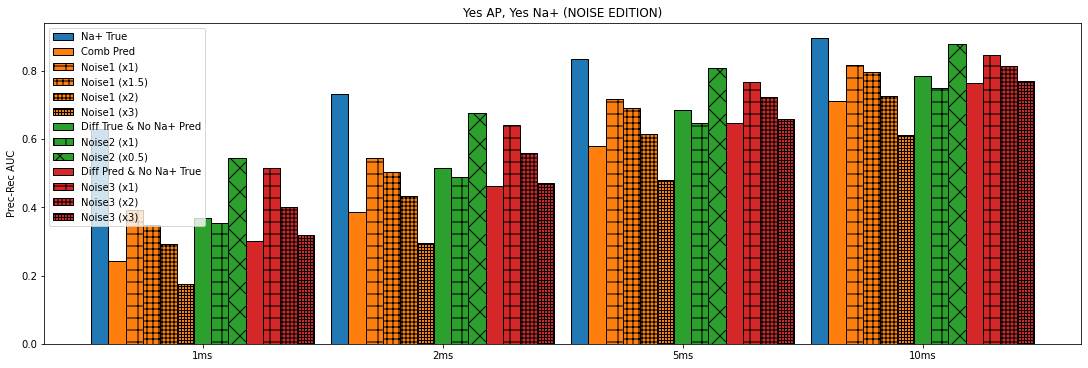

In [56]:
fig = plt.figure(constrained_layout=True, figsize = (15,5))
gs = fig.add_gridspec(1,1, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])

colors = ["tab:blue","tab:orange","tab:green",
         "tab:red","tab:purple","tab:brown","tab:pink","tab:gray",
         "tab:olive","tab:cyan","turquoise","lime", "teal", "chocolate", "deeppink"]

width = 1
bar_no = 1 + 13
ax.bar(np.arange(0,bar_no*4,bar_no), auc_array[:,0], width, label='Na+ True', color=colors[0], edgecolor='black')
ax.bar(np.arange(1,bar_no*4+1,bar_no), auc_array[:,1], width, label='Comb Pred', color=colors[1], edgecolor='black')
ax.bar(np.arange(2,bar_no*4+2,bar_no), auc_array[:,2], width, label='Noise1 (x1)', color=colors[1], hatch='+', edgecolor='black')
ax.bar(np.arange(3,bar_no*4+3,bar_no), auc_array[:,3], width, label='Noise1 (x1.5)', color=colors[1], hatch='++', edgecolor='black')
ax.bar(np.arange(4,bar_no*4+4,bar_no), auc_array[:,4], width, label='Noise1 (x2)', color=colors[1], hatch='+++', edgecolor='black')
ax.bar(np.arange(5,bar_no*4+5,bar_no), auc_array[:,5], width, label='Noise1 (x3)', color=colors[1], hatch='++++', edgecolor='black')
ax.bar(np.arange(6,bar_no*4+6,bar_no), auc_array[:,6], width, label='Diff True & No Na+ Pred', color=colors[2], edgecolor='black')
ax.bar(np.arange(7,bar_no*4+7,bar_no), auc_array[:,7], width, label='Noise2 (x1)', color=colors[2], hatch='+', edgecolor='black')
ax.bar(np.arange(8,bar_no*4+8,bar_no), auc_array[:,8], width, label='Noise2 (x0.5)', color=colors[2], hatch='x', edgecolor='black')
ax.bar(np.arange(9,bar_no*4+9,bar_no), auc_array[:,9], width, label='Diff Pred & No Na+ True', color=colors[3], edgecolor='black')
ax.bar(np.arange(10,bar_no*4+10,bar_no), auc_array[:,10], width, label='Noise3 (x1)', color=colors[3], hatch='+', edgecolor='black')
ax.bar(np.arange(11,bar_no*4+11,bar_no), auc_array[:,11], width, label='Noise3 (x2)', color=colors[3], hatch='+++', edgecolor='black')
ax.bar(np.arange(12,bar_no*4+12,bar_no), auc_array[:,12], width, label='Noise3 (x3)', color=colors[3], hatch='++++', edgecolor='black')



ax.legend()
ax.set_xticks(np.arange(bar_no//2-1,bar_no*4+bar_no//2-1,bar_no))
ax.set_xticklabels(["1ms","2ms","5ms","10ms"])
ax.set_ylabel("Prec-Rec AUC")
ax.set_title("Yes AP, Yes Na+ (NOISE EDITION)")


plt.show()

In [39]:
experiment = "CA1_clust4-60_aSoma"
nll_array = np.zeros((15))

spk = np.load("/media/hdd01/sklee/"+experiment+"/data/spike_train_0.2ms.npy")[-20*50000:]
ap_true = np.load("/media/hdd01/sklee/"+experiment+"/ap_true/gru_l20_h40_0.2ms_test.npy").flatten()
na_true = np.load("/media/hdd01/sklee/"+experiment+"/na_true/gru_l20_h40_0.2ms_test.npy").flatten()
comb_pred = np.load("/media/hdd01/sklee/"+experiment+"/comb_pred/gru_l20_h40_0.2ms_test.npy").flatten()
whole_pred = np.load("/media/hdd01/sklee/"+experiment+"/whole_pred/gru_l20_h40_0.2ms_test.npy").flatten()
nona_true = np.load("/media/hdd01/sklee/"+experiment+"/nona_true/gru_l20_h40_0.2ms_test.npy").flatten()
nona_pred = np.load("/media/hdd01/sklee/"+experiment+"/nona_pred/gru_l20_h40_0.2ms_test.npy").flatten()
diff_true = np.load("/media/hdd01/sklee/"+experiment+"/diff_true/gru_l20_h40_0.2ms_test.npy").flatten()
diff_pred = np.load("/media/hdd01/sklee/"+experiment+"/diff_pred/gru_l20_h40_0.2ms_test.npy").flatten()
diff_true_nona_pred = np.load("/media/hdd01/sklee/"+experiment+"/na_true_nona_pred/gru_l20_h40_0.2ms_test.npy").flatten()
diff_pred_nona_true = np.load("/media/hdd01/sklee/"+experiment+"/na_pred_nona_true/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_late = np.load("/media/hdd01/sklee/"+experiment+"/na_true_late/gru_l20_h40_0.2ms_test.npy").flatten()
comb_pred_late = np.load("/media/hdd01/sklee/"+experiment+"/comb_pred_late/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_noise1 = np.load("/media/hdd01/sklee/"+experiment+"/na_true_1noise1/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_noise2 = np.load("/media/hdd01/sklee/"+experiment+"/na_true_1noise2/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_noise3 = np.load("/media/hdd01/sklee/"+experiment+"/na_true_1noise3/gru_l20_h40_0.2ms_test.npy").flatten()

ap_true_nll = -np.mean(spk*np.log(ap_true) + (1-spk)*np.log(1-ap_true))
na_true_nll = -np.mean(spk*np.log(na_true) + (1-spk)*np.log(1-na_true))
comb_pred_nll = -np.mean(spk*np.log(comb_pred) + (1-spk)*np.log(1-comb_pred))
whole_pred_nll = -np.mean(spk*np.log(whole_pred) + (1-spk)*np.log(1-whole_pred))
nona_true_nll = -np.mean(spk*np.log(nona_true) + (1-spk)*np.log(1-nona_true))
nona_pred_nll = -np.mean(spk*np.log(nona_pred) + (1-spk)*np.log(1-nona_pred))
diff_true_nll = -np.mean(spk*np.log(diff_true) + (1-spk)*np.log(1-diff_true))
diff_pred_nll = -np.mean(spk*np.log(diff_pred) + (1-spk)*np.log(1-diff_pred))
diff_true_nona_pred_nll = -np.mean(spk*np.log(diff_true_nona_pred) + (1-spk)*np.log(1-diff_true_nona_pred))
diff_pred_nona_true_nll = -np.mean(spk*np.log(diff_pred_nona_true) + (1-spk)*np.log(1-diff_pred_nona_true))
na_true_late_nll = -np.mean(spk*np.log(na_true_late) + (1-spk)*np.log(1-na_true_late))
comb_pred_late_nll = -np.mean(spk*np.log(comb_pred_late) + (1-spk)*np.log(1-comb_pred_late))
na_true_noise1_nll = -np.mean(spk*np.log(na_true_noise1) + (1-spk)*np.log(1-na_true_noise1))
na_true_noise2_nll = -np.mean(spk*np.log(na_true_noise2) + (1-spk)*np.log(1-na_true_noise2))
na_true_noise3_nll = -np.mean(spk*np.log(na_true_noise3) + (1-spk)*np.log(1-na_true_noise3))

nll_array[0] = ap_true_nll
nll_array[1] = na_true_nll
nll_array[2] = comb_pred_nll
nll_array[3] = whole_pred_nll
nll_array[4] = nona_true_nll
nll_array[5] = nona_pred_nll
nll_array[6] = diff_true_nll
nll_array[7] = diff_pred_nll
nll_array[8] = diff_true_nona_pred_nll
nll_array[9] = diff_pred_nona_true_nll
nll_array[10] = na_true_late_nll
nll_array[11] = comb_pred_late_nll
nll_array[12] = na_true_noise1_nll
nll_array[13] = na_true_noise2_nll
nll_array[14] = na_true_noise3_nll


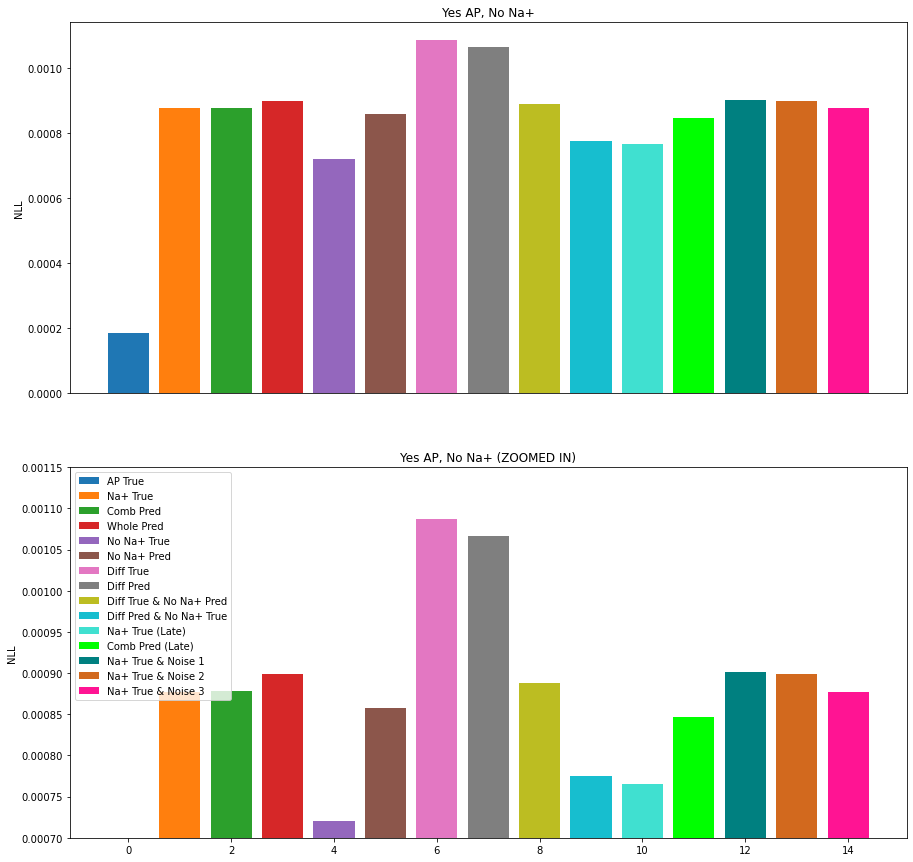

In [41]:
fig, axs = plt.subplots(nrows=2, figsize = (15,15))
colors = ["tab:blue","tab:orange","tab:green",
         "tab:red","tab:purple","tab:brown","tab:pink","tab:gray",
         "tab:olive","tab:cyan","turquoise","lime", "teal", "chocolate", "deeppink"]
labels = ["AP True", "Na+ True", "Comb Pred", "Whole Pred", "No Na+ True", "No Na+ Pred",
                       "Diff True", "Diff Pred", "Diff True & No Na+ Pred", "Diff Pred & No Na+ True",
                       "Na+ True (Late)", "Comb Pred (Late)", "Na+ True & Noise 1", "Na+ True & Noise 2",
                       "Na+ True & Noise 3"]
for i in range(15):
    axs[0].bar(i, nll_array[i], color=colors[i], label=labels[i])
    axs[1].bar(i, nll_array[i], color=colors[i], label=labels[i])
    
axs[0].set_title("Yes AP, No Na+")
axs[1].set_title("Yes AP, No Na+ (ZOOMED IN)")
axs[1].set_ylim(0.0007,0.00115)
axs[0].set_ylabel("NLL")
axs[1].set_ylabel("NLL")
axs[0].set_xticks([])
#axs[1].set_xticklabels(["AP True", "Na+ True", "Comb Pred", "Whole Pred", "No Na+ True", "No Na+ Pred",
                       #"Diff True", "Diff Pred", "Diff True & No Na+ Pred", "Diff Pred & No Na+ True",
                       #"Na+ True (Late)", "Comb Pred (Late)", "Na+ True & Noise 1", "Na+ True & Noise 2",
                       #"Na+ True & Noise 3"], rotation='vertical')
axs[1].legend()

plt.show()

In [50]:
experiment = "CA1_clust4-60_AP"
nll_array = np.zeros((4 + 4+2+3))

spk = np.load("/media/hdd01/sklee/"+experiment+"/data/spike_train_0.2ms.npy")[-20*50000:]
na_true = np.load("/media/hdd01/sklee/"+experiment+"/na_true/gru_l20_h40_0.2ms_test.npy").flatten()
comb_pred = np.load("/media/hdd01/sklee/"+experiment+"/comb_pred/gru_l20_h40_0.2ms_test.npy").flatten()
diff_true_nona_pred = np.load("/media/hdd01/sklee/"+experiment+"/na_true_nona_pred/gru_l20_h40_0.2ms_test.npy").flatten()
diff_pred_nona_true = np.load("/media/hdd01/sklee/"+experiment+"/na_pred_nona_true/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_1noise1 = np.load("/media/hdd01/sklee/"+experiment+"/na_true_1noise1/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_15noise1 = np.load("/media/hdd01/sklee/"+experiment+"/na_true_1.5noise1/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_2noise1 = np.load("/media/hdd01/sklee/"+experiment+"/na_true_2noise1/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_3noise1 = np.load("/media/hdd01/sklee/"+experiment+"/na_true_3noise1/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_1noise2 = np.load("/media/hdd01/sklee/"+experiment+"/na_true_1noise2/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_05noise2 = np.load("/media/hdd01/sklee/"+experiment+"/na_true_0.5noise2/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_1noise3 = np.load("/media/hdd01/sklee/"+experiment+"/na_true_1noise3/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_2noise3 = np.load("/media/hdd01/sklee/"+experiment+"/na_true_2noise3/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_3noise3 = np.load("/media/hdd01/sklee/"+experiment+"/na_true_3noise3/gru_l20_h40_0.2ms_test.npy").flatten()

na_true_nll = -np.mean(spk*np.log(na_true) + (1-spk)*np.log(1-na_true))
comb_pred_nll = -np.mean(spk*np.log(comb_pred) + (1-spk)*np.log(1-comb_pred))
diff_true_nona_pred_nll = -np.mean(spk*np.log(diff_true_nona_pred) + (1-spk)*np.log(1-diff_true_nona_pred))
diff_pred_nona_true_nll = -np.mean(spk*np.log(diff_pred_nona_true) + (1-spk)*np.log(1-diff_pred_nona_true))
na_true_1noise1_nll = -np.mean(spk*np.log(na_true_1noise1) + (1-spk)*np.log(1-na_true_1noise1))
na_true_15noise1_nll = -np.mean(spk*np.log(na_true_15noise1) + (1-spk)*np.log(1-na_true_15noise1))
na_true_2noise1_nll = -np.mean(spk*np.log(na_true_2noise1) + (1-spk)*np.log(1-na_true_2noise1))
na_true_3noise1_nll = -np.mean(spk*np.log(na_true_3noise1) + (1-spk)*np.log(1-na_true_3noise1))
na_true_1noise2_nll = -np.mean(spk*np.log(na_true_1noise2) + (1-spk)*np.log(1-na_true_1noise2))
na_true_05noise2_nll = -np.mean(spk*np.log(na_true_05noise2) + (1-spk)*np.log(1-na_true_05noise2))
na_true_1noise3_nll = -np.mean(spk*np.log(na_true_1noise3) + (1-spk)*np.log(1-na_true_1noise3))
na_true_2noise3_nll = -np.mean(spk*np.log(na_true_2noise3) + (1-spk)*np.log(1-na_true_2noise3))
na_true_3noise3_nll = -np.mean(spk*np.log(na_true_3noise3) + (1-spk)*np.log(1-na_true_3noise3))

nll_array[0] = na_true_nll
nll_array[1] = comb_pred_nll
nll_array[2] = na_true_1noise1_nll
nll_array[3] = na_true_15noise1_nll
nll_array[4] = na_true_2noise1_nll
nll_array[5] = na_true_3noise1_nll
nll_array[6] = diff_true_nona_pred_nll
nll_array[7] = na_true_1noise2_nll
nll_array[8] = na_true_05noise2_nll
nll_array[9] = diff_pred_nona_true_nll
nll_array[10] = na_true_1noise3_nll
nll_array[11] = na_true_2noise3_nll
nll_array[12] = na_true_3noise3_nll

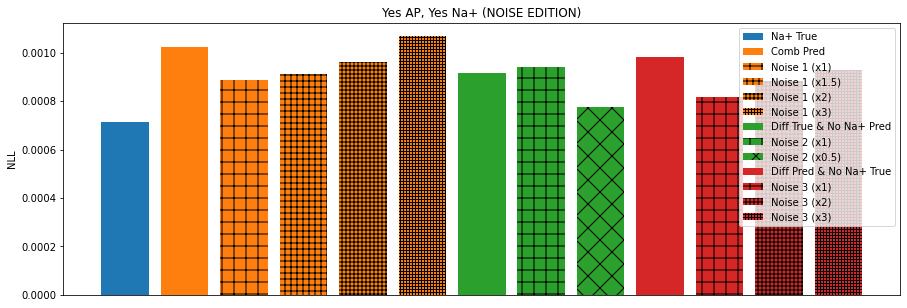

In [57]:
plt.figure(figsize = (15,5))

colors = ["tab:blue","tab:orange","tab:green",
         "tab:red"]

plt.bar(0, nll_array[0], color=colors[0], label="Na+ True")
plt.bar(1, nll_array[1], color=colors[1], label="Comb Pred")
plt.bar(2, nll_array[2], color=colors[1], hatch="+", label="Noise 1 (x1)")
plt.bar(3, nll_array[3], color=colors[1], hatch="++", label="Noise 1 (x1.5)")
plt.bar(4, nll_array[4], color=colors[1], hatch="+++", label="Noise 1 (x2)")
plt.bar(5, nll_array[5], color=colors[1], hatch="++++", label="Noise 1 (x3)")
plt.bar(6, nll_array[6], color=colors[2], label="Diff True & No Na+ Pred")
plt.bar(7, nll_array[7], color=colors[2], hatch="+", label="Noise 2 (x1)")
plt.bar(8, nll_array[8], color=colors[2], hatch="x", label="Noise 2 (x0.5)")
plt.bar(9, nll_array[9], color=colors[3], label="Diff Pred & No Na+ True")
plt.bar(10, nll_array[10], color=colors[3], hatch="+", label="Noise 3 (x1)")
plt.bar(11, nll_array[11], color=colors[3], hatch="+++", label="Noise 3 (x2)")
plt.bar(12, nll_array[12], color=colors[3], hatch="++++", label="Noise 3 (x3)")

plt.title("Yes AP, Yes Na+ (NOISE EDITION)")
plt.ylabel("NLL")
plt.xticks([])
plt.legend()